In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [2]:
import numpy as np
import networkx as nx
import pandas as pd

# Import our refactored functions
from scripts import (
    load_graph_from_csv,
    create_graphs,
    calculate_distance_matrices,
    solve_pmedian_problem,
    extract_distances_from_solution,
    create_results_dataframe,
    draw_graph_with_centers,
    plot_multiple_quantile_distributions,
    prune_leaf_nodes
)

In [3]:
CSV_FILE = 'Tata_upd.csv'
NUM_FACILITIES = 6  # Number of centers to place (p parameter)
SOLVER_PATH = '/usr/local/bin/glpsol'  # Configurable solver path

In [4]:
print("Loading and preprocessing graph data...")
edges_data = load_graph_from_csv(CSV_FILE, weight_value=1.0)
print(f"Loaded {len(edges_data)} unique edges")
edges_data.head()

Loading and preprocessing graph data...
Loaded 177 unique edges


,source,target,weight
0,0,8,1.0
1,0,10,1.0
2,8,5,1.0
3,10,13,1.0
4,1,91,1.0


In [5]:
print("Creating graph representations...")
igraph_graph, networkx_graph = create_graphs(edges_data)
print(f"Created graphs with {igraph_graph.vcount()} vertices and {igraph_graph.ecount()} edges")

Creating graph representations...
Created graphs with 136 vertices and 177 edges


In [6]:
# This functionality is available but not used in the main analysis
# pruned_graph = prune_leaf_nodes(networkx_graph)
# print(f"Pruned graph would have {len(pruned_graph.nodes())} nodes")

In [7]:
print("Calculating distance matrices...")
protected_distances, resistance_distances, geodesic_distances = calculate_distance_matrices(
    igraph_graph, networkx_graph
)
print(f"- Protected distances: {protected_distances.shape}")
print(f"- Resistance distances: {resistance_distances.shape}")
print(f"- Geodesic distances: {geodesic_distances.shape}")

Calculating distance matrices...
No speed attributes found. Using standard protected distances...


100%|██████████| 177/177 [00:02<00:00, 76.32it/s]


- Protected distances: (136, 136)
- Resistance distances: (136, 136)
- Geodesic distances: (136, 136)


In [8]:
num_clients = len(networkx_graph.nodes)
num_locations = len(networkx_graph.nodes)
num_facilities = NUM_FACILITIES

print(f"Problem parameters:")
print(f"- Number of clients: {num_clients}")
print(f"- Number of potential locations: {num_locations}")
print(f"- Number of facilities to place: {num_facilities}")

Problem parameters:
- Number of clients: 136
- Number of potential locations: 136
- Number of facilities to place: 6


In [21]:
print("\nSolving P-median problem with geodesic distances...")
geodesic_solution = solve_pmedian_problem(
    geodesic_distances, 
    num_facilities, 
    solver_path=SOLVER_PATH
)
print("Geodesic solution:")
print(geodesic_solution)
print(f"Selected vertices: {list(geodesic_solution.keys())}")


Solving P-median problem with geodesic distances...
Parameters
Variables
Objective function
Constraints
Initializing solver
Starting solving
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /var/tmp/tmp85or5nwn.glpk.raw --wglp /var/tmp/tmpc_fzpqia.glpk.glp
 --cpxlp /var/tmp/tmph2zpkykz.pyomo.lp
Reading problem data from '/var/tmp/tmph2zpkykz.pyomo.lp'...
/var/tmp/tmph2zpkykz.pyomo.lp:148525: warning: lower bound of variable 'x18363' redefined
/var/tmp/tmph2zpkykz.pyomo.lp:148525: warning: upper bound of variable 'x18363' redefined
18633 rows, 18632 columns, 55624 non-zeros
18632 integer variables, all of which are binary
167157 lines were read
Writing problem data to '/var/tmp/tmpc_fzpqia.glpk.glp'...
129885 lines were written
GLPK Integer Optimizer 5.0
18633 rows, 18632 columns, 55624 non-zeros
18632 integer variables, all of which are binary
Preprocessing...
18633 rows, 18632 columns, 55624 non-zeros
18632 integer variables, all of which are binary

In [10]:
print("\nSolving P-median problem with resistance distances...")
resistance_solution = solve_pmedian_problem(
    resistance_distances, 
    num_facilities, 
    solver_path=SOLVER_PATH
)
print("Resistance solution:")
print(resistance_solution)
print(f"Selected vertices: {list(resistance_solution.keys())}")


Solving P-median problem with resistance distances...
Starting solving
Resistance solution:
{12: [0, 8, 10, 13, 12, 11, 16, 17, 31, 30, 34, 14, 35, 68], 120: [5, 1, 91, 126, 90, 92, 94, 105, 128, 127, 2, 3, 49, 6, 48, 7, 9, 18, 19, 15, 119, 71, 60, 72, 95, 120, 122, 46, 123, 124, 45, 87, 88, 73, 96, 93, 125, 89], 52: [20, 26, 52, 21, 132, 133, 70, 53, 55, 25, 23, 29, 84, 22, 37, 54, 36, 74, 118, 57, 131, 38, 39, 58, 51, 59, 136, 135, 56], 129: [32, 129, 130, 117, 113, 144, 134, 33, 112, 109, 116, 110, 115, 114], 141: [40, 41, 142, 47, 141, 107, 108, 43, 139, 137, 86, 83, 140, 138], 98: [81, 24, 27, 76, 97, 99, 77, 78, 85, 80, 82, 61, 69, 79, 62, 64, 63, 65, 98, 67, 100, 104, 75, 102, 101, 106, 103]}
Selected vertices: [12, 120, 52, 129, 141, 98]


In [11]:
print("\nSolving P-median problem with protected distances...")
protected_solution = solve_pmedian_problem(
    protected_distances, 
    num_facilities, 
    solver_path=SOLVER_PATH
)
print("Protected solution:")
print(protected_solution)
print(f"Selected vertices: {list(protected_solution.keys())}")


Solving P-median problem with protected distances...
Starting solving
Protected solution:
{11: [5, 6, 7, 12, 11, 16, 17, 31, 30, 34, 14, 35, 68, 60, 69, 124, 45], 95: [0, 8, 10, 13, 1, 91, 126, 90, 92, 94, 105, 128, 127, 2, 3, 49, 48, 9, 18, 19, 15, 119, 71, 72, 95, 120, 122, 61, 46, 123, 64, 65, 67, 87, 88, 73, 96, 93, 125, 89, 106, 103], 52: [20, 52, 21, 133, 70, 53, 55, 25, 23, 24, 29, 22, 37, 54, 36, 74, 118, 57, 131, 134, 33, 38, 39, 58, 51, 59, 136, 135, 56], 76: [26, 81, 84, 27, 76, 97, 99, 77, 78, 85, 80, 82, 79, 62, 63, 98, 100, 104, 75, 102, 101], 129: [132, 32, 129, 130, 117, 113, 144, 112, 109, 116, 110, 115, 114], 141: [40, 41, 142, 47, 141, 107, 108, 43, 139, 137, 86, 83, 140, 138]}
Selected vertices: [11, 95, 52, 76, 129, 141]



Visualizing original graph...


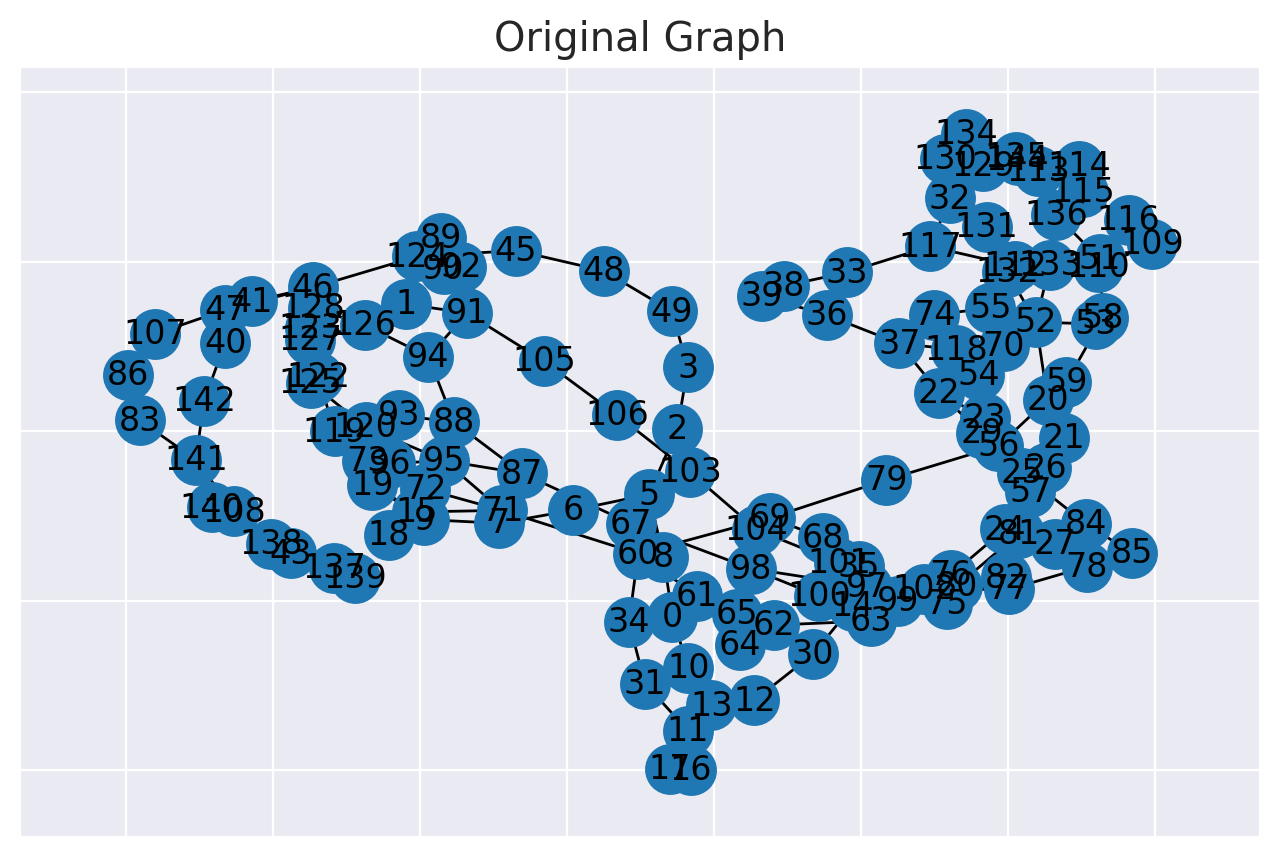

In [12]:
print("\nVisualizing original graph...")
nx.draw_networkx(networkx_graph)
plt.title("Original Graph")
plt.show()

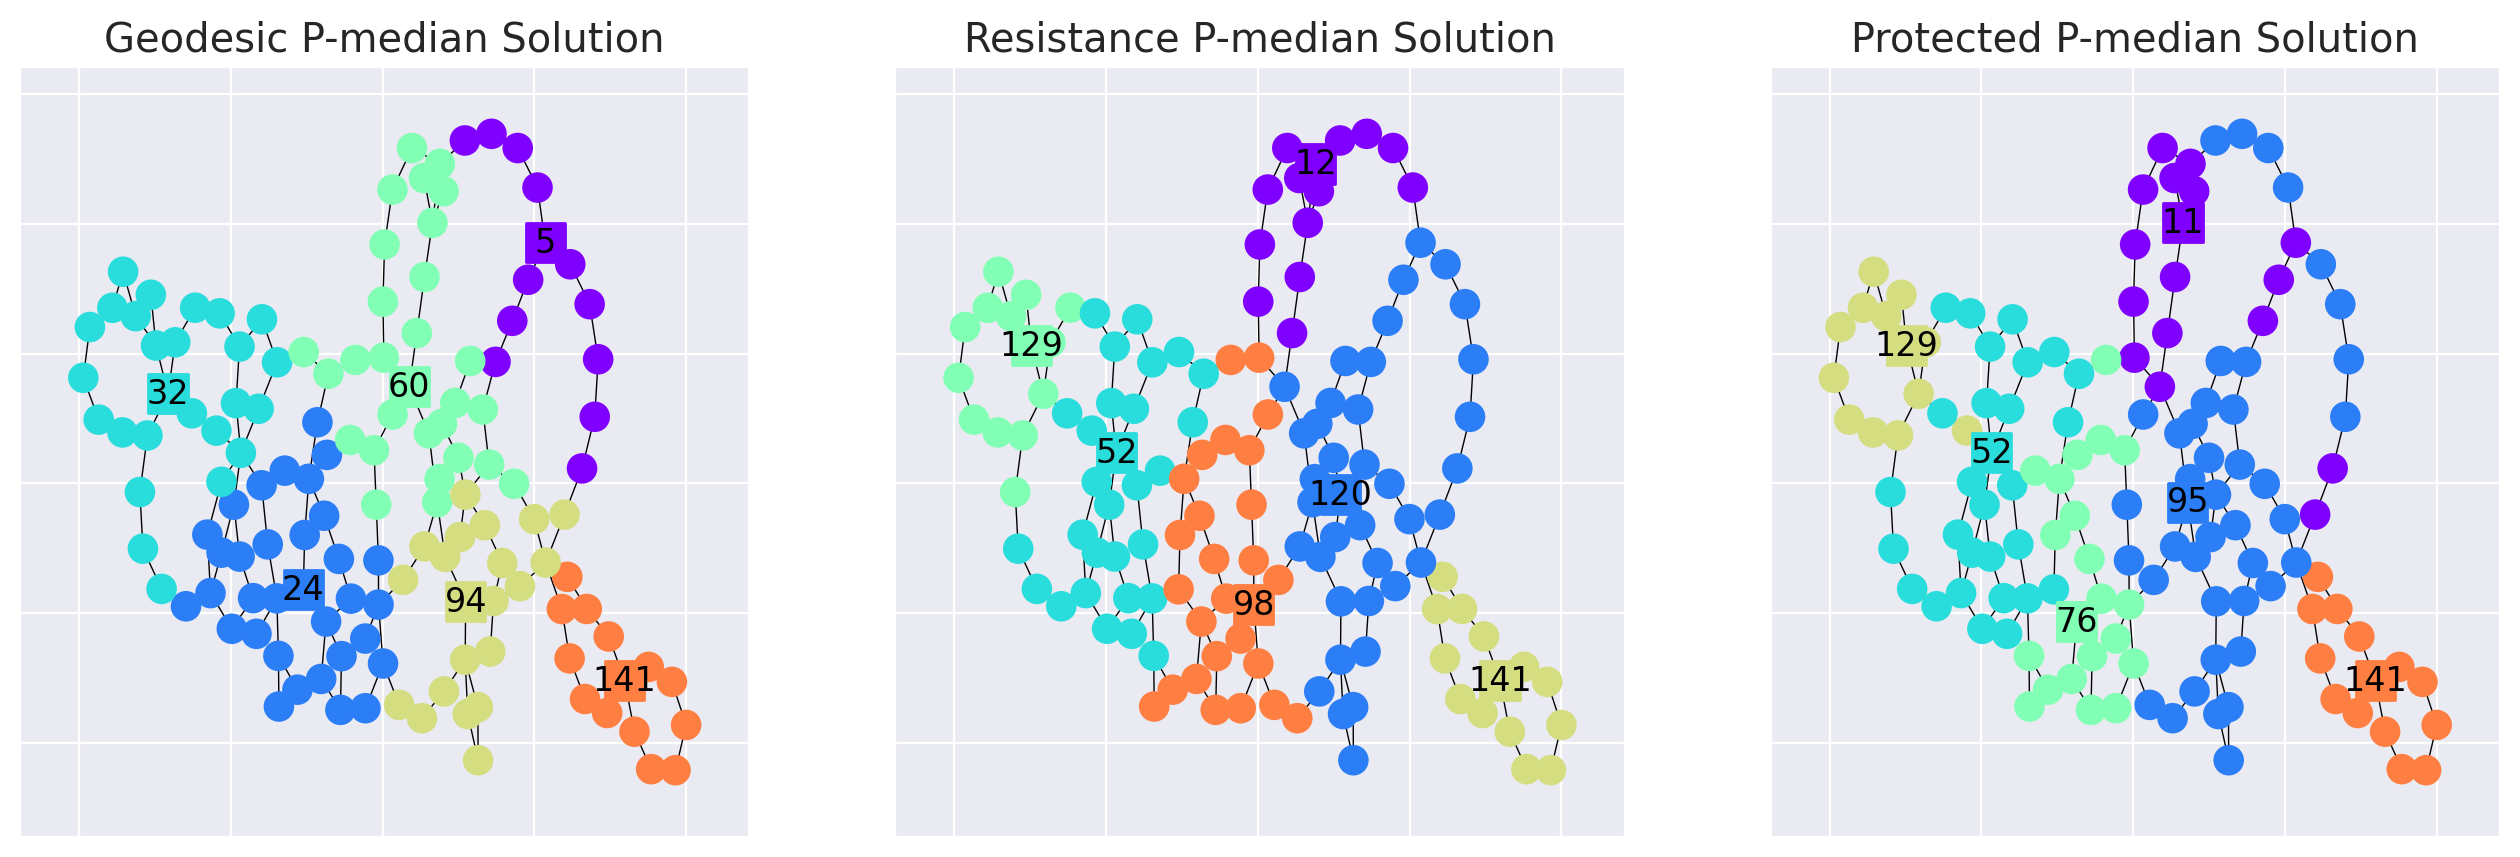

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

draw_graph_with_centers(
    networkx_graph, 
    geodesic_solution, 
    title='Geodesic P-median Solution',
    ax = axes[0]
)

draw_graph_with_centers(
    networkx_graph, 
    resistance_solution, 
    title='Resistance P-median Solution',
    ax = axes[1]
)

draw_graph_with_centers(
    networkx_graph, 
    protected_solution, 
    title='Protected P-median Solution',
    ax = axes[2]
)

In [14]:
print("\nCalculating protected distances dictionary for detailed analysis...")
protected_dict = {
    (row_name, col_name): protected_distances.loc[row_name, col_name]
    for row_name in protected_distances.index
    for col_name in protected_distances.columns
}
print(f"Protected distances dictionary contains {len(protected_dict)} entries")


Calculating protected distances dictionary for detailed analysis...
Protected distances dictionary contains 18496 entries


In [15]:
print("Extracting distances for geodesic solution analysis...")
geodesic_analysis_distances = extract_distances_from_solution(
    geodesic_solution, 
    protected_dict
)
print(f"Extracted {len(geodesic_analysis_distances)} distance values")

Extracting distances for geodesic solution analysis...
Extracted 136 distance values


In [16]:
print("Extracting distances for resistance solution analysis...")
resistance_analysis_distances = extract_distances_from_solution(
    resistance_solution, 
    protected_dict
)
print(f"Extracted {len(resistance_analysis_distances)} distance values")

Extracting distances for resistance solution analysis...
Extracted 136 distance values


In [17]:
print("Extracting distances for protected solution analysis...")
protected_analysis_distances = extract_distances_from_solution(
    protected_solution, 
    protected_dict
)
print(f"Extracted {len(protected_analysis_distances)} distance values")

Extracting distances for protected solution analysis...
Extracted 136 distance values


Plotting quantile distributions comparison...


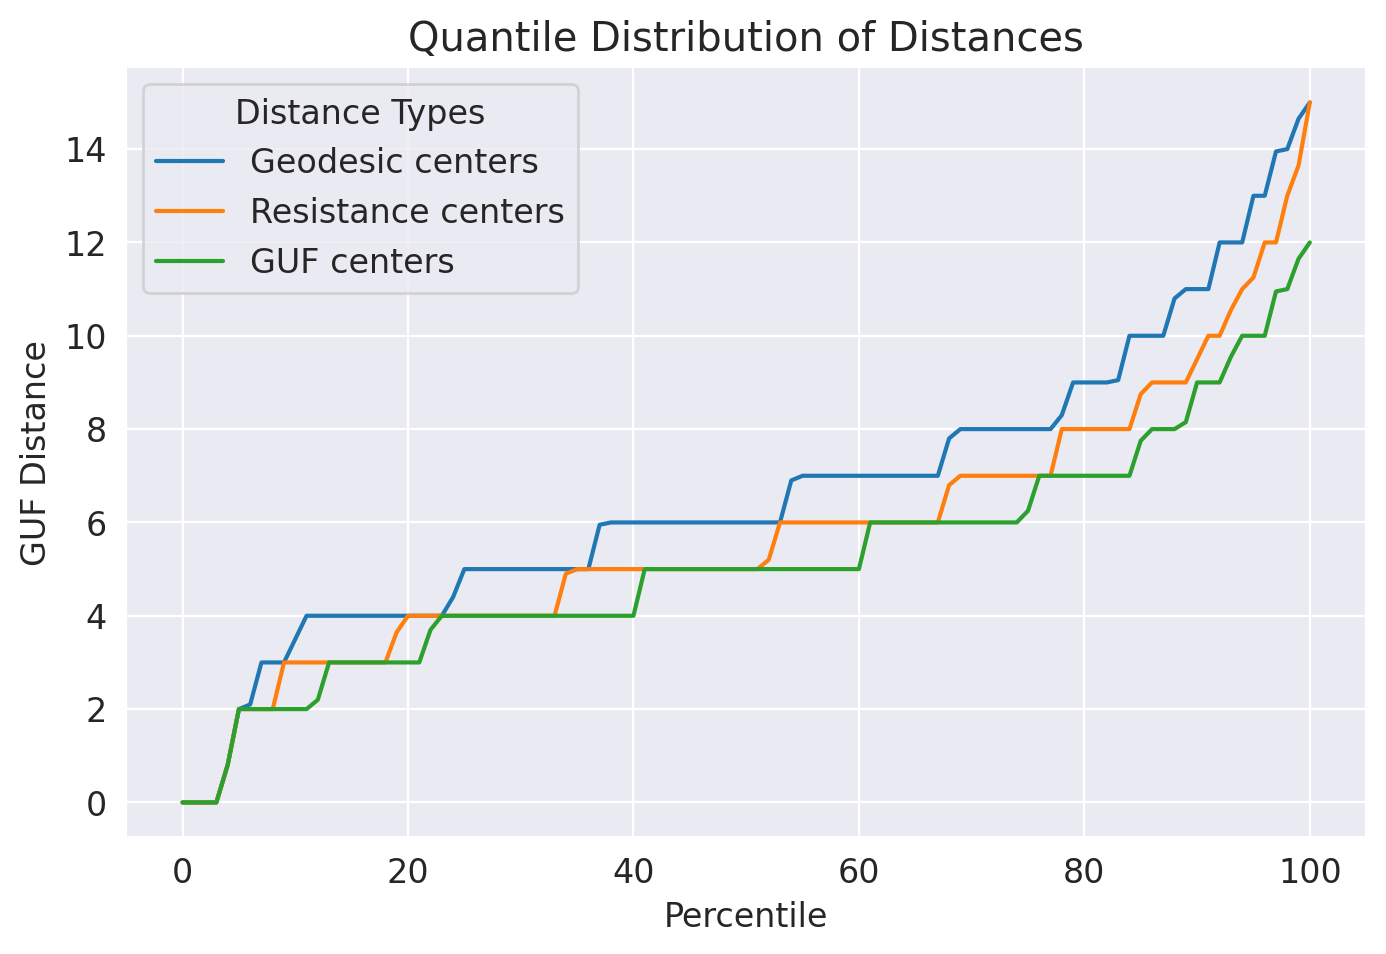

In [18]:
print("Plotting quantile distributions comparison...")
plot_multiple_quantile_distributions(
    [geodesic_analysis_distances, resistance_analysis_distances, protected_analysis_distances],
    ['Geodesic centers', 'Resistance centers', 'GUF centers']
)


In [19]:
print("Creating results DataFrame and performing statistical analysis...")
results_df = create_results_dataframe(
    geodesic_analysis_distances,
    resistance_analysis_distances, 
    protected_analysis_distances
)

# Calculate quantiles for analysis
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
statistical_summary = results_df.describe(percentiles=quantiles)

print("Statistical Summary:")
print(statistical_summary)

Creating results DataFrame and performing statistical analysis...
Statistical Summary:
         geodesic  resistance   protected
count  136.000000  136.000000  136.000000
mean     6.632353    5.757353    5.198529
std      3.164172    2.907198    2.520493
min      0.000000    0.000000    0.000000
10%      3.500000    3.000000    2.000000
20%      4.000000    4.000000    3.000000
30%      5.000000    4.000000    4.000000
40%      6.000000    5.000000    4.000000
50%      6.000000    5.000000    5.000000
60%      7.000000    6.000000    5.000000
70%      8.000000    7.000000    6.000000
80%      9.000000    8.000000    7.000000
90%     11.000000    9.500000    9.000000
max     15.000000   15.000000   12.000000


In [20]:
print("\n" + "="*60)
print("FINAL RESULTS SUMMARY")
print("="*60)

print(f"\nProblem Configuration:")
print(f"- Dataset: {CSV_FILE}")
print(f"- Number of facilities: {num_facilities}")
print(f"- Graph size: {num_clients} nodes, {igraph_graph.ecount()} edges")

print(f"\nSolution Comparison:")
print(f"- Geodesic centers: {list(geodesic_solution.keys())}")
print(f"- Resistance centers: {list(resistance_solution.keys())}")
print(f"- Protected centers: {list(protected_solution.keys())}")

print(f"\nDistance Analysis (median values):")
print(f"- Geodesic solution median distance: {np.median(geodesic_analysis_distances):.2f}")
print(f"- Resistance solution median distance: {np.median(resistance_analysis_distances):.2f}")
print(f"- Protected solution median distance: {np.median(protected_analysis_distances):.2f}")

print("\nAnalysis complete!")


FINAL RESULTS SUMMARY

Problem Configuration:
- Dataset: Tata_upd.csv
- Number of facilities: 6
- Graph size: 136 nodes, 177 edges

Solution Comparison:
- Geodesic centers: [5, 24, 32, 60, 94, 141]
- Resistance centers: [12, 120, 52, 129, 141, 98]
- Protected centers: [11, 95, 52, 76, 129, 141]

Distance Analysis (median values):
- Geodesic solution median distance: 6.00
- Resistance solution median distance: 5.00
- Protected solution median distance: 5.00

Analysis complete!
